### CONSTANTS

In [1]:
PATHES = ['data/X_train.csv', 'data/X_test.csv', 'data/y_train.csv', 'data/y_test.csv']
MODEL_PATH = "models/xgboost.pickle.dat"
COLUMNS = ['Air temperature K', 'Process temperature K',
           'Rotational speed rpm', 'Torque Nm', 'Tool wear min', 'Air times process temp',
           'Rot spd ovr torque', 'Rot spd times tool wr', 'Torque times tool wr', 'Type_M', 'Type_L', 'Type_H']

### Importing Libraries

In [2]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

import pickle

### Functions

In [3]:
def get_train_test_data(pathes):
    data = []
    for path in pathes:
        df = pd.read_csv(path)
        data.append(df)
    return data

### Reading Data and Model

In [4]:
X_train, X_test, y_train, y_test = get_train_test_data(PATHES)
X_train.columns = COLUMNS
X_test.columns = COLUMNS
model = pickle.load(open(MODEL_PATH, "rb"))
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'model: {model}')

X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000, 1)
y_test shape: (2000, 1)
model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### 01. Extracting SHAP Values

In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

### 02. Plotting SHAP

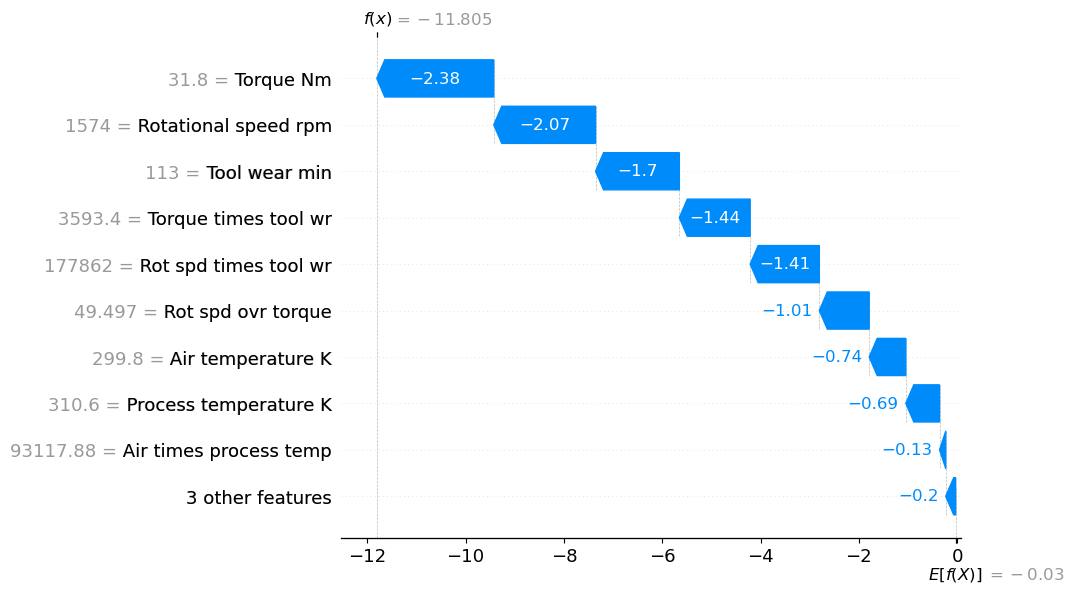

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(14, 5))
shap.plots.waterfall(shap_values[12])
plt.tight_layout()

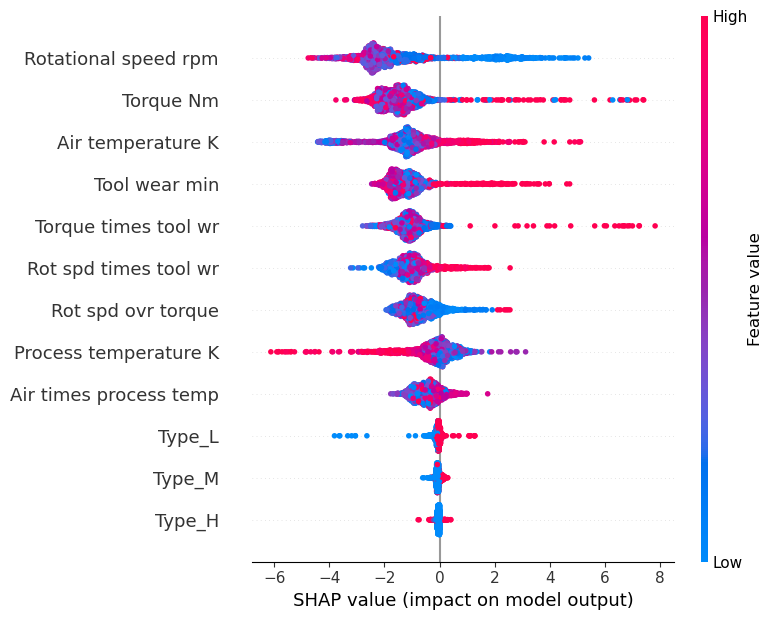

In [7]:
shap.summary_plot(shap_values)

### 03. Exporting Explainer

In [8]:
pickle.dump(explainer, open("models/explainer.pickle.dat", "wb"))

In [21]:
{i:0 for i in COLUMNS}

{'Air temperature K': 0,
 'Process temperature K': 0,
 'Rotational speed rpm': 0,
 'Torque Nm': 0,
 'Tool wear min': 0,
 'Air times process temp': 0,
 'Rot spd ovr torque': 0,
 'Rot spd times tool wr': 0,
 'Torque times tool wr': 0,
 'Type_M': 0,
 'Type_L': 0,
 'Type_H': 0}

In [ ]:
d